In [1]:
import numpy as np
import commpy
from commpy import PSKModem, QAMModem
from matplotlib import pyplot as plt
from matplotlib import pyplot

In [5]:
#
# Set up the constellation and some constants for QPSK
##
nsymbols=4
repeats_per_symbol = 16
samples_per_second = 1000
message_len = 3000
total_samples = repeats_per_symbol*message_len
baseband_carrier_freq = 3000
noise_sd = 0.1

duration = total_samples/samples_per_second
time = np.linspace(0, duration, total_samples)/samples_per_second  # clock time of each sample
print(np.max(time))

0.048


[0.00000000e+00 1.00002083e-06 2.00004167e-06 3.00006250e-06
 4.00008334e-06 5.00010417e-06 6.00012500e-06 7.00014584e-06
 8.00016667e-06 9.00018750e-06]


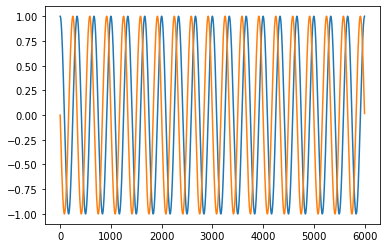

In [3]:

#
# Setup the baseband
#
print(time[:10])
baseband_signal =  np.cos(2*np.pi*time*baseband_carrier_freq)   - 1j *np.sin(2*np.pi*time*baseband_carrier_freq)

pyplot.close("all")
pyplot.plot(np.real(baseband_signal[:6000]))
pyplot.plot(np.imag(baseband_signal[:6000]))
pyplot.show()


In [ ]:





m = QAMModem(nsymbols)
con = m.constellation
con = con/np.max(np.abs(con))  # power normalizing


#
# There is non-unit amplitude in this constellation plot which can cause issues.
#
pyplot.close("all")
m.plot_constellation()
con
pyplot.close("all")
pyplot.scatter(np.real(con), np.imag(con))
pyplot.title("Power Normalized Symbol Table")
pyplot.show()

In [ ]:
symbol_message = np.random.randint(0, nsymbols, message_len)
symbol_message[:10]
message_with_repeats = np.repeat(symbol_message, repeats_per_symbol)
message_with_repeats[:10]

In [ ]:
#
# An IQ encoding of a message is just a symbol lookup table
#

iq_encoded_message = con[message_with_repeats]
iq_encoded_message

#
#
#

In [ ]:
channel_iq = iq_encoded_message + np.random.normal(0,noise_sd/np.sqrt(2),len(iq_encoded_message)) +  1.j*np.random.normal(0,noise_sd/np.sqrt(2), len(iq_encoded_message))
channel_iq[:10]

In [ ]:
plt.close("all")
plt.scatter(np.real(channel_iq[:1000]), np.imag(channel_iq[:1000]))
plt.title("Noised Message Constellation")
plt.show()

In [ ]:
modulated = channel_iq*baseband_signal

In [ ]:
fftLen = len(modulated)  # perform 4-times zeropadding to get smoother spectrum
spectrum = lambda x: np.fft.fftshift(np.fft.fft(x, fftLen)) / baseband_carrier_freq * (len(modulated))
pyplot.close("all")
pyplot.specgram(modulated,Fs=baseband_carrier_freq)
pyplot.xlabel("Time")
pyplot.ylabel("Frequency")
pyplot.show()
#
# Pretty sure my units are screwed up here...
#
f = spectrum(modulated)
pyplot.close("all")
pyplot.plot(np.abs(f))
pyplot.show()